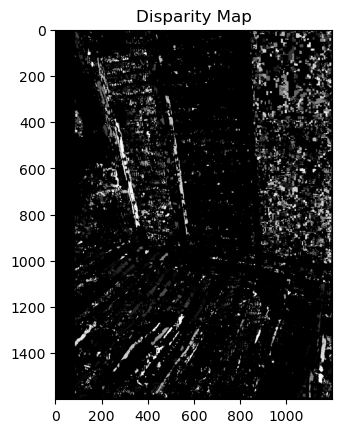

Extracted 3D points:  (270432, 3)


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the stereo images (left and right)
imgL = cv2.imread('left_image.jpg', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('right_image.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize stereo matcher (you can try both StereoBM and StereoSGBM)
# StereoBM (Block Matching)
stereo = cv2.StereoBM_create(numDisparities=16*5, blockSize=15)

# Or you can try StereoSGBM (Semi-Global Block Matching) for better results
# stereo = cv2.StereoSGBM_create(minDisparity=0,
#                                numDisparities=16*5,
#                                blockSize=15,
#                                P1=8 * 3 * 15 ** 2,
#                                P2=32 * 3 * 15 ** 2,
#                                disp12MaxDiff=1,
#                                uniquenessRatio=15,
#                                speckleWindowSize=0,
#                                speckleRange=2,
#                                preFilterCap=63)

# Compute the disparity map
disparity = stereo.compute(imgL, imgR)

# Normalize the disparity for better visualization
disparity = cv2.normalize(disparity, disparity, alpha=255,
                          beta=0, norm_type=cv2.NORM_MINMAX)
disparity = np.uint8(disparity)

# Display the disparity map
plt.imshow(disparity, cmap='gray')
plt.title('Disparity Map')
plt.show()

# Reproject disparity to 3D space (You need calibration parameters for this)
# You can use dummy calibration parameters for this example
focal_length = 0.8 * imgL.shape[1]  # Example focal length
Q = np.float32([[1, 0, 0, -imgL.shape[1] / 2],
                [0, -1, 0, imgL.shape[0] / 2], 
                [0, 0, 0, focal_length],
                [0, 0, 1, 0]])

# Reproject to 3D
points_3D = cv2.reprojectImageTo3D(disparity, Q)

# Mask to get rid of points with low disparity values (outliers)
mask = disparity > disparity.min()

# Extract the 3D coordinates for valid disparity points
output_points = points_3D[mask]

# Display some example 3D points
print("Extracted 3D points: ", output_points.shape)